In [85]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [86]:
#read loan.csv file from loan_doc folder
##provide path according to your system
loan_df = pd.read_csv('loan_doc/loan.csv')
#read first 10 record in table
print(loan_df.head(10))
loan_df.shape

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.

(39717, 111)

# Data Cleaning
## Removing all coloumn with null values

In [87]:
df = pd.DataFrame(loan_df)
# Drop empty columns
df = df.drop(df.columns[df.isna().all()], axis=1)
print(df.shape)

(39717, 57)


In [88]:
#Check info 
#Check null values
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [89]:
#summarise missing value
100*(df.isnull().sum()/len(df.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


# Handling missing values in columns

In [90]:
#removing the column having more than 90% missing values
missing_col = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]
print(missing_col)

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [91]:
# Drop column which is more than 90% blank
df = df.drop(['mths_since_last_record', 'next_pymnt_d'], axis=1)
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [92]:
#removing the column having more than 30% missing values
missing_col = df.columns[100*(df.isnull().sum()/len(df.index)) > 30]
print(missing_col)
print(df.shape)

Index(['desc', 'mths_since_last_delinq'], dtype='object')
(39717, 55)


In [93]:
df = df.drop(['desc', 'mths_since_last_delinq'], axis=1)
df.shape
#df.head(10)

(39717, 53)

In [94]:
#missing values in rows
df.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

# Standardizing the data

    we need to standardize the data in this column
    "int_rate" is one column.
    "emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [96]:
#column int_rate is object type convert it in to int
df['int_rate'] = df['int_rate'].apply(lambda x: pd.to_numeric(str(x).split("%")[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [97]:
#extract numeric part from the emp_length
#first drop the missing coloumn from the column
df = df[~df['emp_length'].isnull()]
#by using reguler expression extract numeric value from the string
import re
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d', str(x))[0])
#convert to numeric
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [98]:
#Removing unwanted column
df = df.drop(['id', 'url', 'title','zip_code', 'emp_title','out_prncp_inv'], axis=1)
df.shape

(38642, 47)

In [99]:
#convet loan status in binary 0 and 1
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()


Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [100]:
#filtering only fully paid
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
#summarize 
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [104]:
df.shape

(37544, 47)

In [105]:
# Describing the dataframe
print(df.describe())

          member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  3.754400e+04  37544.000000  37544.000000     37544.000000   
mean   8.394864e+05  11119.329986  10853.560489     10280.495739   
std    2.655176e+05   7354.098954   7096.316776      7034.124211   
min    7.069900e+04    500.000000    500.000000         0.000000   
25%    6.564908e+05   5500.000000   5400.000000      5000.000000   
50%    8.352880e+05  10000.000000   9600.000000      8850.000000   
75%    1.034972e+06  15000.000000  15000.000000     14075.000000   
max    1.314167e+06  35000.000000  35000.000000     35000.000000   

           int_rate   installment    emp_length    annual_inc   loan_status  \
count  37544.000000  37544.000000  37544.000000  3.754400e+04  37544.000000   
mean      11.963319    324.650164      3.026316  6.940708e+04      0.143805   
std        3.683012    208.901055      2.375987  6.467698e+04      0.350896   
min        5.420000     15.690000      1.000000  4.000000e+03      0.00

## Univariate Analysis 

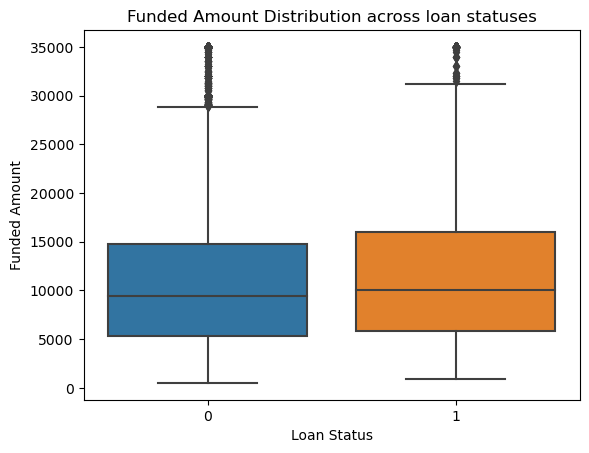

In [103]:
# Segmented Univariate analysis using loan_amnt
box_plot = sns.boxplot(x='loan_status',y='funded_amnt',data=df)
plt.ylabel('Funded Amount')
plt.xlabel('Loan Status')
plt.title('Funded Amount against loan statuses')
plt.show()


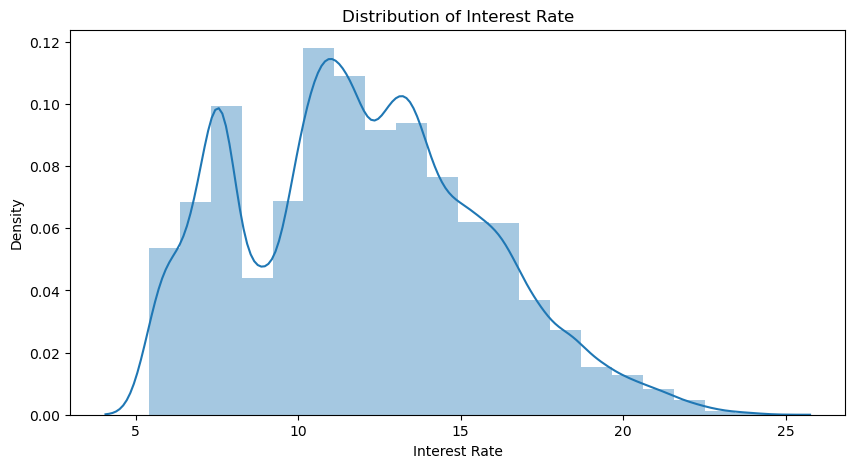

In [109]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

<Axes: xlabel='loan_amnt', ylabel='Density'>

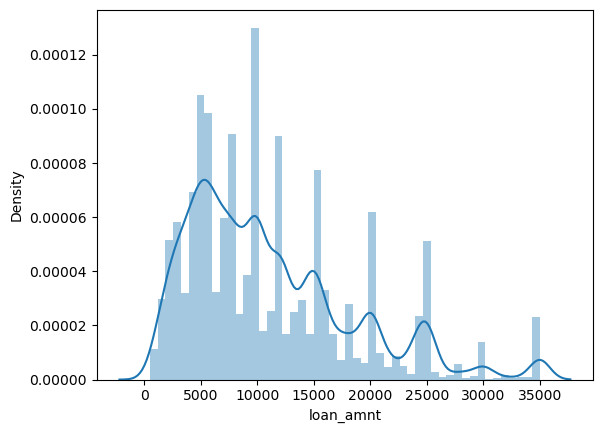

In [50]:
#Plot a histogram for loan_amnt.
sns.distplot(df['loan_amnt'])

In [51]:
#default rate
round(np.mean(df['loan_amnt']), 2)

11119.33

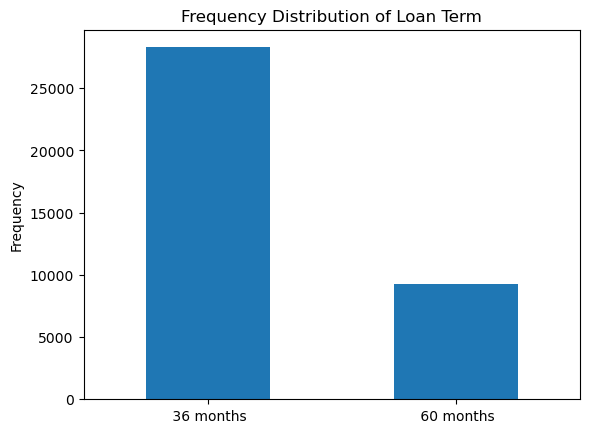

In [112]:
# Univariate analysis on term
df.term.value_counts().sort_index().plot.bar()
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.title('Frequency Distribution of Loan Term')
plt.show()

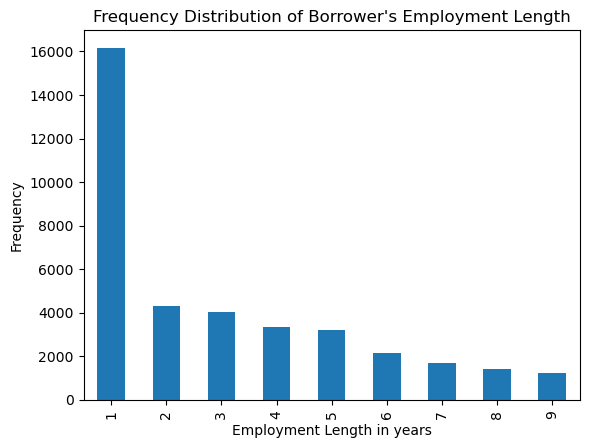

In [113]:
# Univariate analysis on Employment Length
df.emp_length.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Employment Length in years')
plt.title('Frequency Distribution of Borrower Employment Length')
plt.show()

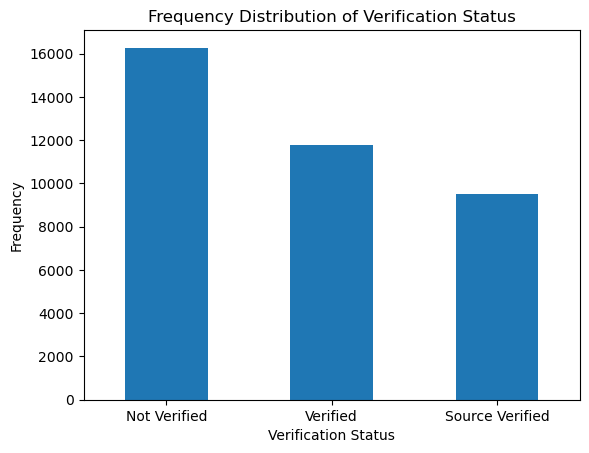

In [115]:
# Univariate analysis on Verification Status
df.verification_status.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Verification Status')
plt.xticks(rotation=0)
plt.title('Frequency Distribution of Verification Status')
plt.show()

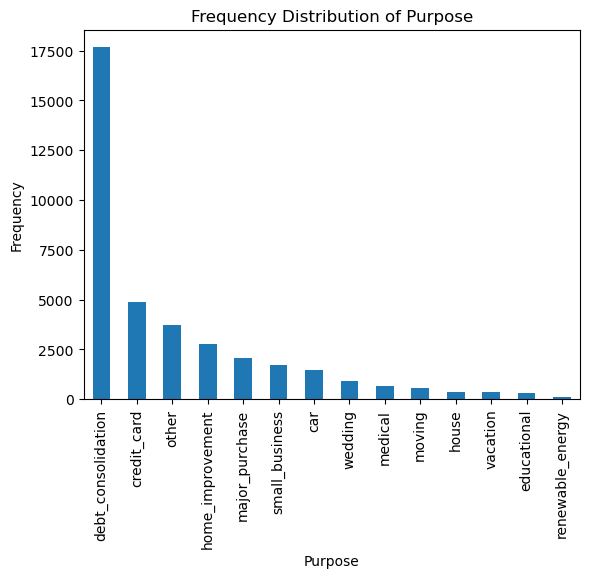

In [116]:
# Univariate analysis on Purpose
df.purpose.value_counts().plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.title('Frequency Distribution of Purpose')
plt.show()

In [124]:
#checking unique values for home_ownership
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

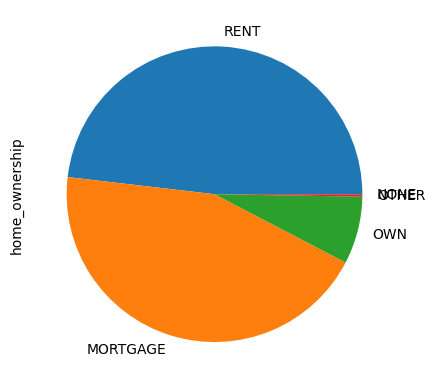

In [123]:
# Distribution of home_ownership
df['home_ownership'].value_counts().plot.pie()
plt.show()

## Bivariate analysis

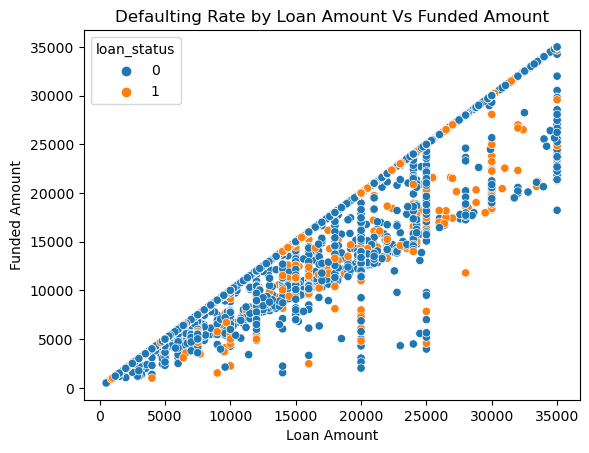

In [119]:
# Bivariate Analysis: Loan Amount vs Funded Amount
ax = sns.scatterplot(x='loan_amnt',y='funded_amnt',data=df,hue='loan_status')
ax.set(xlabel='Loan Amount',ylabel='Funded Amount',title='Defaulting Rate by Loan Amount Vs Funded Amount')
plt.show()

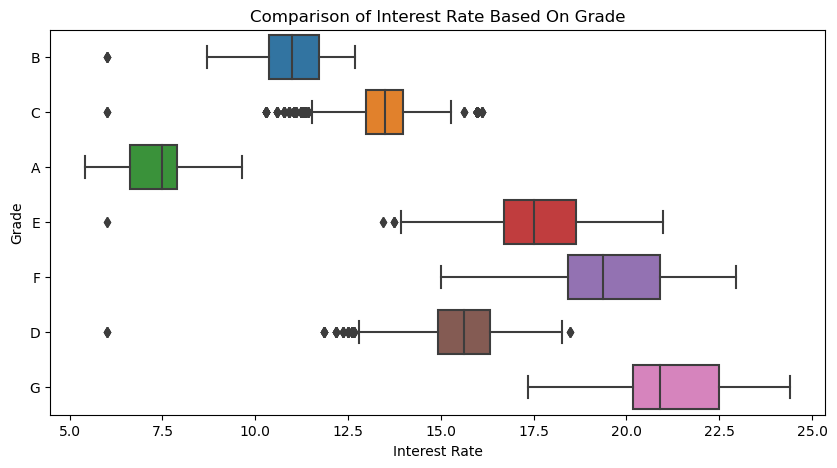

In [121]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

In [ ]:
###funded_amnt vs annual_inc
#Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(inp4.funded_amnt, inp4.annual_inc)
plt.show()